In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics



In [2]:
df = pd.read_csv("processed_data_2_og.csv",encoding = "utf-8")

In [34]:
df.describe()

,Prices,Area,type,certificate,width,length,floors,Latitude,Longitude,District_Mapped,...,Prices_normalized,prices_capped,log_prices,Area_capped,log_Area,floors_capped,width_capped,log_width,length_capped,log_length
count,11287.000000,11287.000000,11287.000000,11287.000000,11287.000000,11287.000000,11287.000000,11287.000000,11287.000000,11287.000000,...,11287.000000,11287.000000,11287.000000,11287.000000,11287.000000,11287.000000,11287.000000,11287.000000,11287.000000,11287.000000
mean,8.426160,86.855473,0.691415,0.757686,6.095018,16.649025,2.720918,16.054544,108.211440,4.006468,...,0.023650,7.942454,1.797749,84.073317,4.214724,2.684239,5.983232,1.723886,16.237339,2.682367
std,11.545246,63.137919,0.461930,0.428502,5.377507,26.736293,2.092892,0.022741,0.026221,1.965558,...,0.036768,7.424895,0.721446,46.494739,0.846948,1.195294,2.612800,0.356599,7.233759,0.529171
min,1.000000,0.103000,0.000000,0.000000,0.400000,0.020600,1.000000,15.964750,108.100692,1.000000,...,0.000000,1.000000,0.000000,0.103000,-2.273026,1.000000,0.400000,-0.916291,0.020600,-3.882464
25%,3.600000,60.000000,0.000000,1.000000,4.500000,12.000000,2.000000,16.041185,108.194250,2.000000,...,0.008280,3.600000,1.280934,60.000000,4.094345,2.000000,4.500000,1.504077,12.000000,2.484907
50%,5.250000,80.000000,1.000000,1.000000,5.000000,16.000000,3.000000,16.058362,108.215596,4.000000,...,0.013535,5.250000,1.658228,80.000000,4.382027,3.000000,5.000000,1.609438,16.000000,2.772589
75%,8.900000,100.000000,1.000000,1.000000,6.500000,20.000000,3.000000,16.069840,108.231987,6.000000,...,0.025159,8.900000,2.186051,100.000000,4.605170,3.000000,6.500000,1.871802,20.000000,2.995732
max,315.000000,950.000000,1.000000,1.000000,420.000000,2020.000000,123.000000,16.109347,108.286588,7.000000,...,1.000000,43.061897,5.752573,276.269230,6.856462,8.000000,22.227540,6.040255,96.857903,7.610853


In [3]:
df['Prices_normalized'] = (df['Prices'] - df['Prices'].min()) / (df['Prices'].max() - df['Prices'].min())

In [4]:
uppper_boundary=df['Prices'].mean() + 3* df['Prices'].std()
print("Upper bound for price:",uppper_boundary)
df['prices_capped'] = df['Prices']
df.loc[(df.Prices>uppper_boundary),'prices_capped'] = uppper_boundary

Upper bound for price: 43.0618972051879


In [5]:
df['prices_capped'].unique()

array([ 4.1       ,  3.3       , 15.        ,  6.5       , 11.        ,
        7.2       ,  2.9       ,  3.5       ,  4.7       , 25.        ,
        5.2       ,  6.6       ,  5.7       ,  6.7       ,  3.75      ,
        6.8       ,  4.75      ,  6.4       ,  2.75      ,  2.6       ,
        3.8       ,  3.35      ,  2.55      ,  1.75      ,  3.69      ,
        5.95      ,  6.        ,  2.8       ,  3.2       ,  2.15      ,
        3.65      ,  1.65      ,  2.7       ,  3.15      ,  1.85      ,
        2.83      ,  1.49      ,  5.35      ,  3.9       ,  6.35      ,
        5.8       ,  8.5       ,  4.15      ,  4.9       ,  7.5       ,
        5.        ,  4.8       , 18.8       ,  4.4       ,  3.55      ,
       14.        , 24.        ,  3.85      ,  2.85      ,  4.3       ,
        4.2       , 20.        ,  5.4       ,  2.25      ,  2.2       ,
        2.1       ,  1.5       ,  2.05      ,  7.3       , 16.5       ,
       14.2       ,  3.995     , 16.        , 43.06189721,  9.  

In [6]:
df['log_prices'] = np.log(df['Prices'])

<Axes: xlabel='prices_capped', ylabel='Count'>

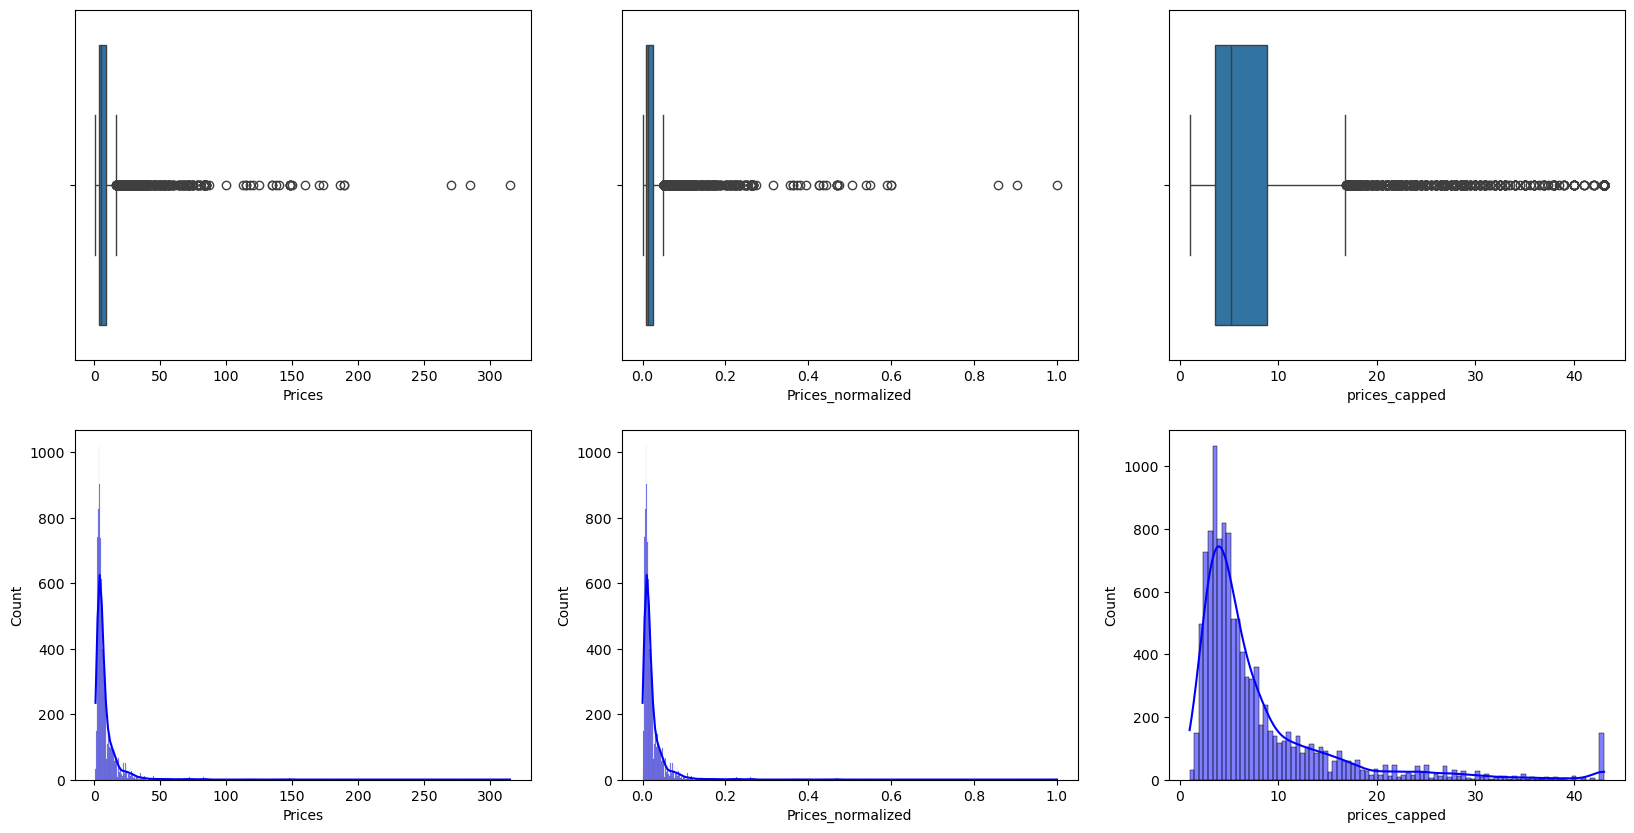

In [91]:
fig, axes = plt.subplots(ncols=3,nrows=2, figsize=(20,10))
sns.boxplot(data=df,x='Prices',ax=axes[0][0])
sns.boxplot(data=df,x='Prices_normalized',ax=axes[0][1])
sns.boxplot(data=df,x='prices_capped',ax=axes[0][2])

sns.histplot(df["Prices"], kde=True, color='blue', ax=axes[1][0])
sns.histplot(df["Prices_normalized"], kde=True, color='blue', ax=axes[1][1])
sns.histplot(df["prices_capped"], kde=True, color='blue', ax=axes[1][2])

In [94]:
print("Mean of prices: ", np.mean(df["Prices"]))
print("Mean of prices_capped: ", np.mean(df["prices_capped"]))
print("std of Prices: ", np.std(df["Prices"]))
print("std of Prices_capped: ", np.std(df["prices_capped"]))


Mean of prices:  8.426159676125812
Mean of prices_capped:  7.942453810011044
std of Prices:  11.544734391723878
std of Prices_capped:  7.424566514374364


### Area

In [8]:
uppper_boundary=df['Area'].mean() + 3* df['Area'].std()
print("Upper bound for area:",uppper_boundary)
df['Area_capped'] = df['Area']
df.loc[(df.Area>uppper_boundary),'Area_capped'] = uppper_boundary
df['log_Area'] = np.log(df['Area'])

Upper bound for area: 276.2692297258002


<Axes: xlabel='log_Area', ylabel='Count'>

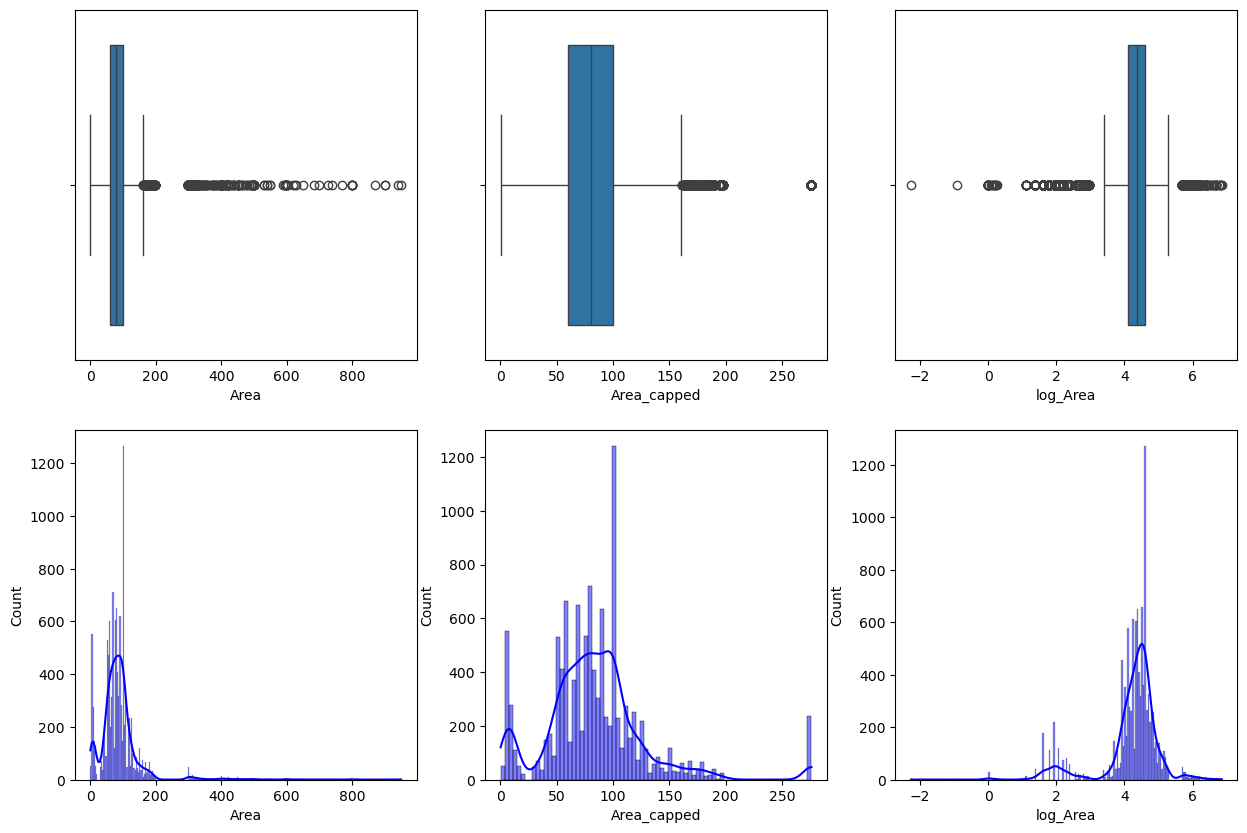

In [83]:
fig, axes = plt.subplots(ncols=3,nrows=2, figsize=(15,10))
sns.boxplot(data=df,x='Area',ax=axes[0][0])
sns.boxplot(data=df,x='Area_capped',ax=axes[0][1])
sns.boxplot(data=df,x='log_Area',ax=axes[0][2])
sns.histplot(df["Area"], kde=True, color='blue', ax=axes[1][0])
sns.histplot(df["Area_capped"], kde=True, color='blue', ax=axes[1][1])
sns.histplot(df["log_Area"], kde=True, color='blue', ax=axes[1][2])

In [97]:
print("Mean of Area: ", np.mean(df["Area"]))
print("Mean of Area_capped: ", np.mean(df["Area_capped"]))
print("std of Area: ", np.std(df["Area"]))
print("std of Area_capped: ", np.std(df["Area_capped"]))


Mean of Area:  86.85547250981793
Mean of Area_capped:  84.07331670623988
std of Area:  63.13512207909963
std of Area_capped:  46.49267960747237


### Floors

In [10]:
uppper_boundary=df['floors'].mean() + 3* df['floors'].std()
print("Upper bound for floors:",uppper_boundary)
df['floors_capped'] = df['floors']
df.loc[(df.floors_capped>uppper_boundary),'floors_capped'] = int(uppper_boundary)
# df['log_floors'] = np.log(df['floors'])

Upper bound for floors: 8.99959315952584


<Axes: xlabel='floors_capped', ylabel='Count'>

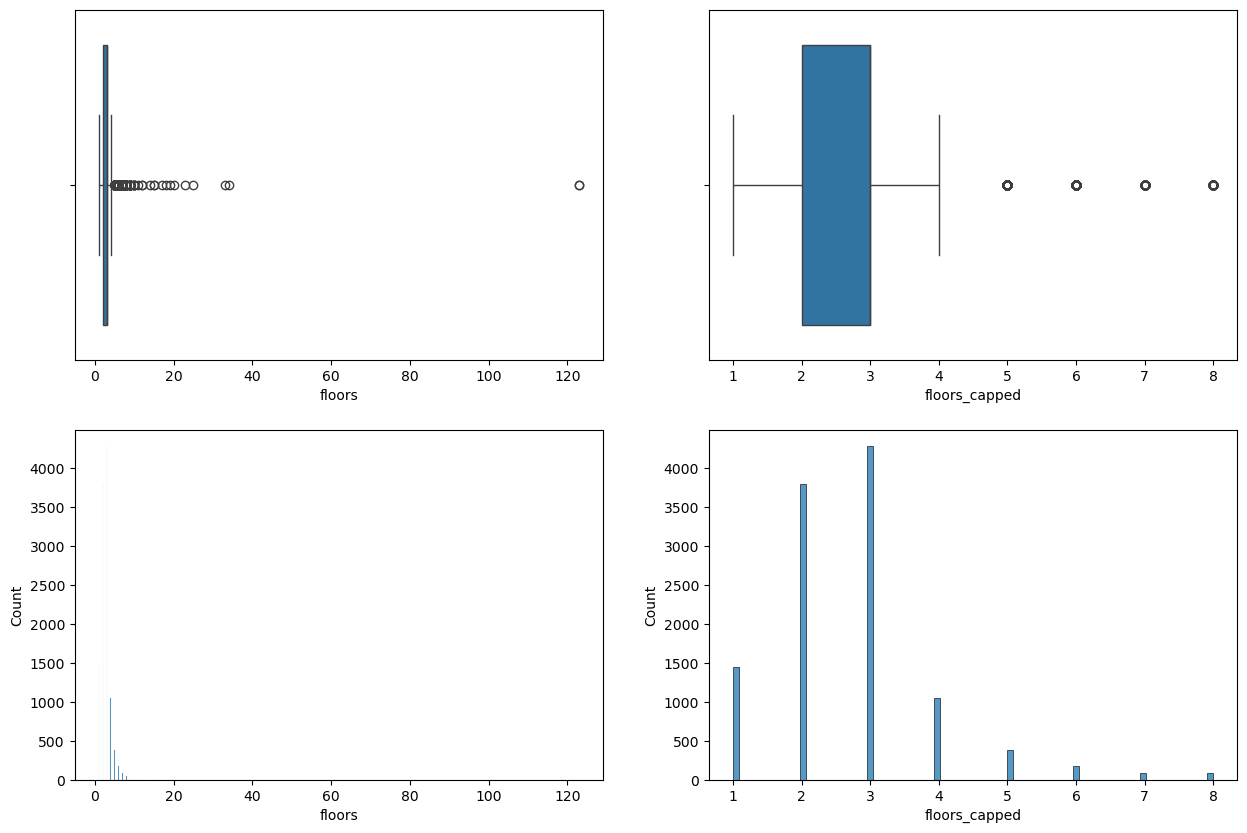

In [11]:
fig, axes = plt.subplots(ncols=2,nrows=2, figsize=(15,10))
sns.boxplot(data=df,x='floors',ax=axes[0][0])
sns.boxplot(data=df,x='floors_capped',ax=axes[0][1])
sns.histplot(data=df,x='floors',ax=axes[1][0])
sns.histplot(data=df,x='floors_capped',ax=axes[1][1])

In [98]:
print("Mean of floors: ", np.mean(df["floors"]))
print("Mean of floors_capped: ", np.mean(df["floors_capped"]))
print("std of floors: ", np.std(df["floors"]))
print("std of floors_capped: ", np.std(df["floors_capped"]))


Mean of floors:  2.720917870116063
Mean of floors_capped:  2.6842385044741737
std of floors:  2.0927990485923638
std of floors_capped:  1.1952412223851152


### Width

In [12]:
uppper_boundary=df['width'].mean() + 3* df['width'].std()
print("Upper bound for width:",uppper_boundary)
df['width_capped'] = df['width']
df.loc[(df.width_capped>uppper_boundary),'width_capped'] = uppper_boundary
df['log_width'] = np.log(df['width'])

Upper bound for width: 22.227540267464


<Axes: xlabel='log_width', ylabel='Count'>

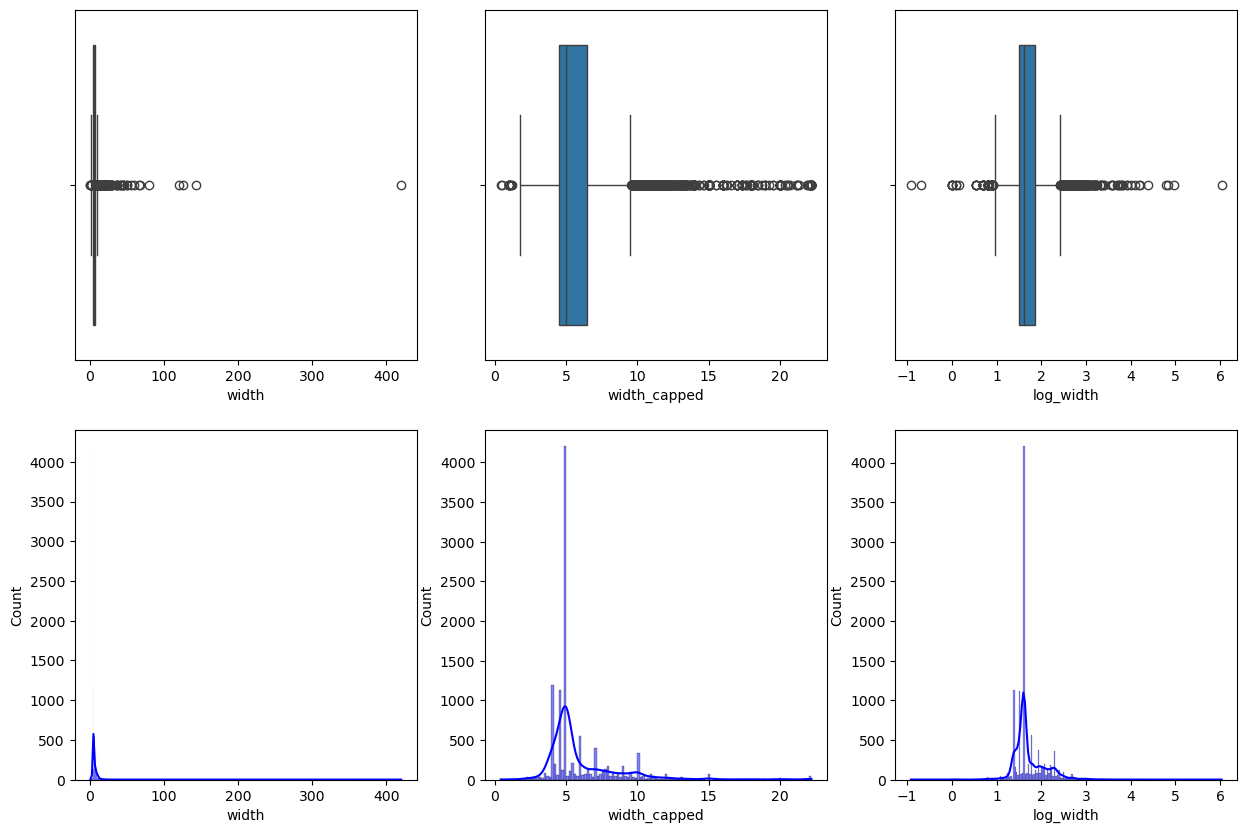

In [95]:
fig, axes = plt.subplots(ncols=3,nrows=2, figsize=(15,10))
sns.boxplot(data=df,x='width',ax=axes[0][0])
sns.boxplot(data=df,x='width_capped',ax=axes[0][1])
sns.boxplot(data=df,x='log_width',ax=axes[0][2])
sns.histplot(df["width"], kde=True, color='blue', ax=axes[1][0])
sns.histplot(df["width_capped"], kde=True, color='blue', ax=axes[1][1])
sns.histplot(df["log_width"], kde=True, color='blue',ax=axes[1][2])

In [99]:
print("Mean of width: ", np.mean(df["width"]))
print("Mean of width_capped: ", np.mean(df["width_capped"]))
print("std of width: ", np.std(df["width"]))
print("std of width_capped: ", np.std(df["width_capped"]))


Mean of width:  6.095018101540056
Mean of width_capped:  5.983231999691296
std of width:  5.377269166505125
std of width_capped:  2.612683861497646


### Length

In [14]:
uppper_boundary=df['length'].mean() + 3* df['length'].std()
print("Upper bound for length:",uppper_boundary)
df['length_capped'] = df['length']
df.loc[(df.length_capped>uppper_boundary),'length_capped'] = uppper_boundary
df['log_length'] = np.log(df['length'])

Upper bound for length: 96.85790292073943


<Axes: xlabel='log_length', ylabel='Count'>

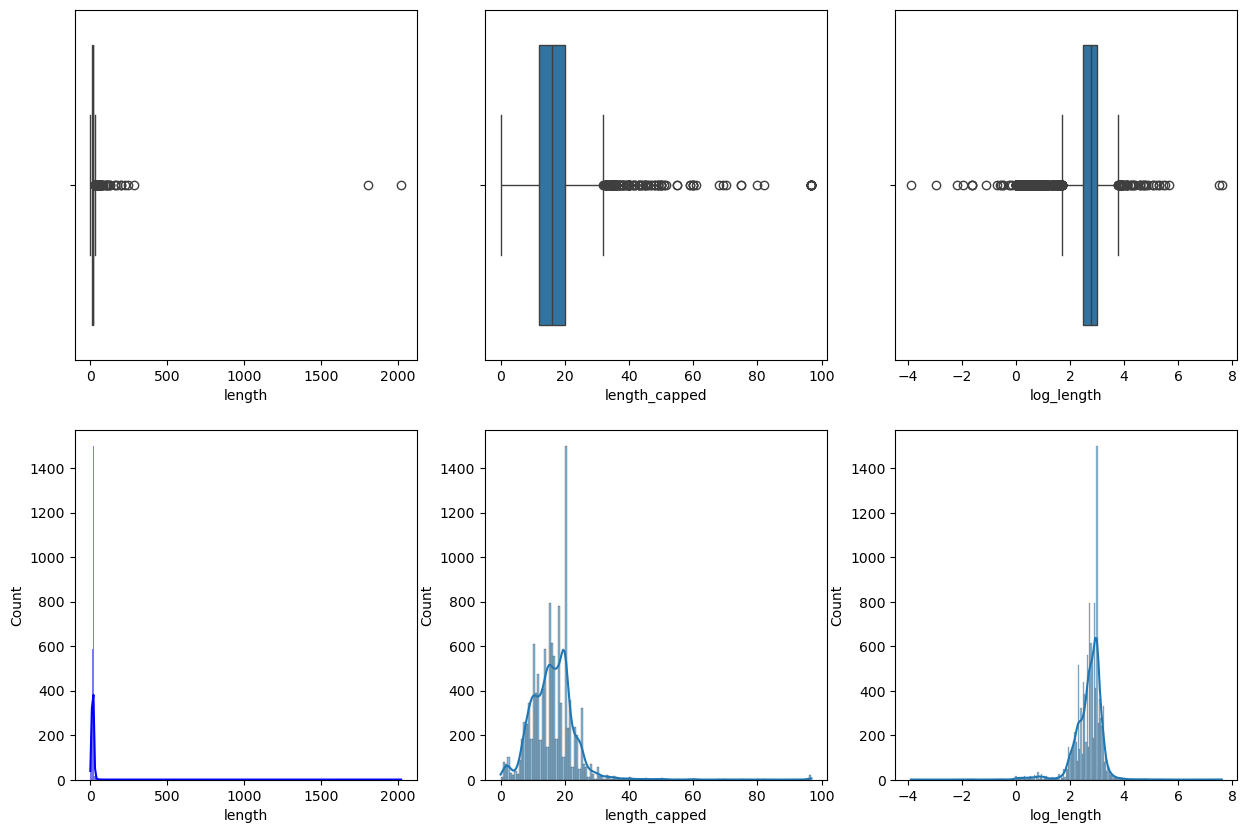

In [102]:
fig, axes = plt.subplots(ncols=3,nrows=2, figsize=(15,10))
sns.boxplot(data=df,x='length',ax=axes[0][0])
sns.boxplot(data=df,x='length_capped',ax=axes[0][1])
sns.boxplot(data=df,x='log_length',ax=axes[0][2])
sns.histplot(df["length"], kde=True, color='blue', ax=axes[1][0])
sns.histplot(df['length_capped'],kde = True, ax=axes[1][1])
sns.histplot(df['log_length'],kde = True, ax=axes[1][2])

In [100]:
print("Mean of length: ", np.mean(df["length"]))
print("Mean of length_capped: ", np.mean(df["length_capped"]))
print("std of length: ", np.std(df["length"]))
print("std of length_capped: ", np.std(df["length_capped"]))


Mean of length:  16.64902538802045
Mean of length_capped:  16.23733939134233
std of length:  26.735108100313198
std of length_capped:  7.233438662124715


### Distance to center

In [16]:
# uppper_boundary=df['distance_to_center'].mean() + 3* df['distance_to_center'].std()
# print("Upper bound for distance_to_center:",uppper_boundary)
# df_copy.loc[(df_copy.distance_to_center>uppper_boundary),'distance_to_center'] = uppper_boundary
# df['log_distance_to_center'] = np.log(df['distance_to_center'])

<Axes: xlabel='distance_to_center', ylabel='Count'>

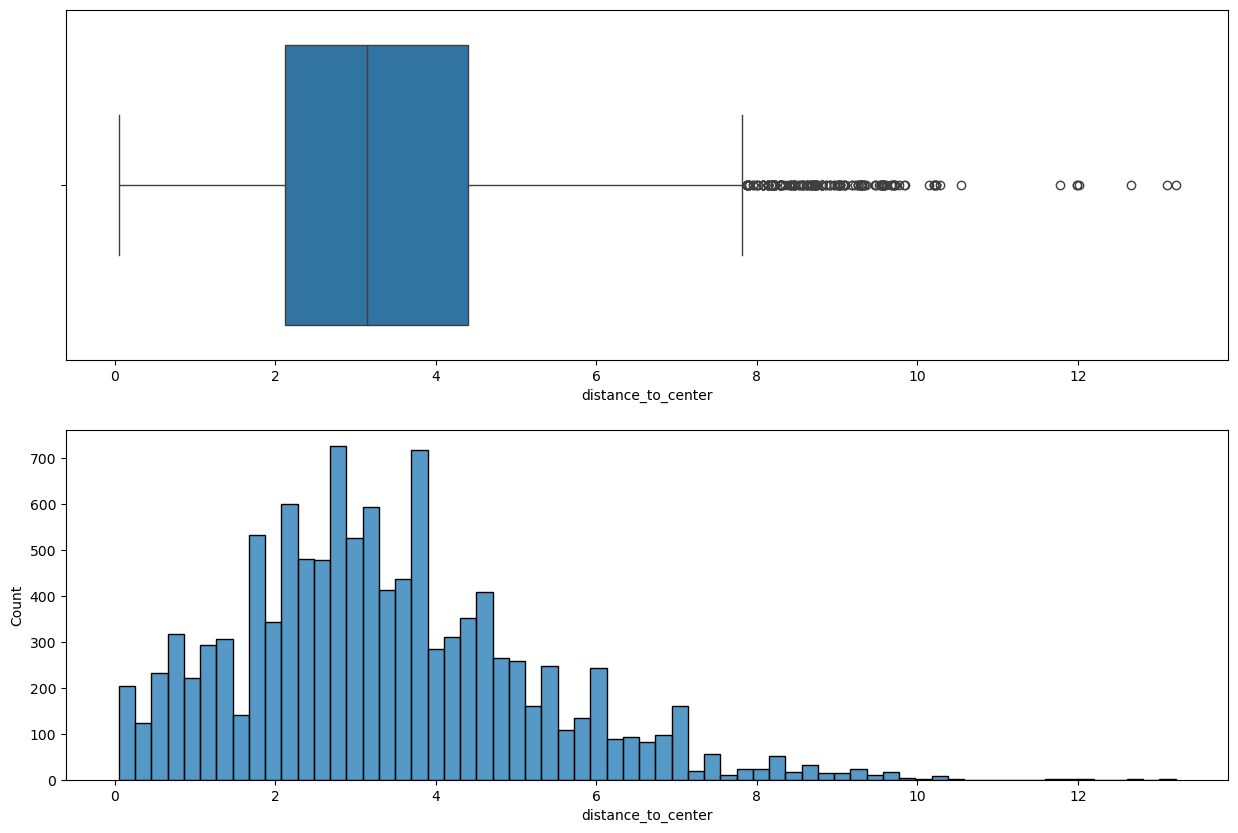

In [17]:
fig, axes = plt.subplots(ncols=1,nrows=2, figsize=(15,10))
sns.boxplot(data=df,x='distance_to_center',ax=axes[0])
sns.histplot(data=df,x='distance_to_center',ax=axes[1])

### Distance to beach

In [18]:
uppper_boundary=df['distance_to_beach'].mean() + 3* df['distance_to_beach'].std()
print("Upper bound for distance_to_beach:",uppper_boundary)
df_copy.loc[(df_copy.distance_to_beach>uppper_boundary),'distance_to_beach'] = uppper_boundary

Upper bound for distance_to_beach: 12.457605460265738


NameError: name 'df_copy' is not defined

<Axes: xlabel='distance_to_beach', ylabel='Count'>

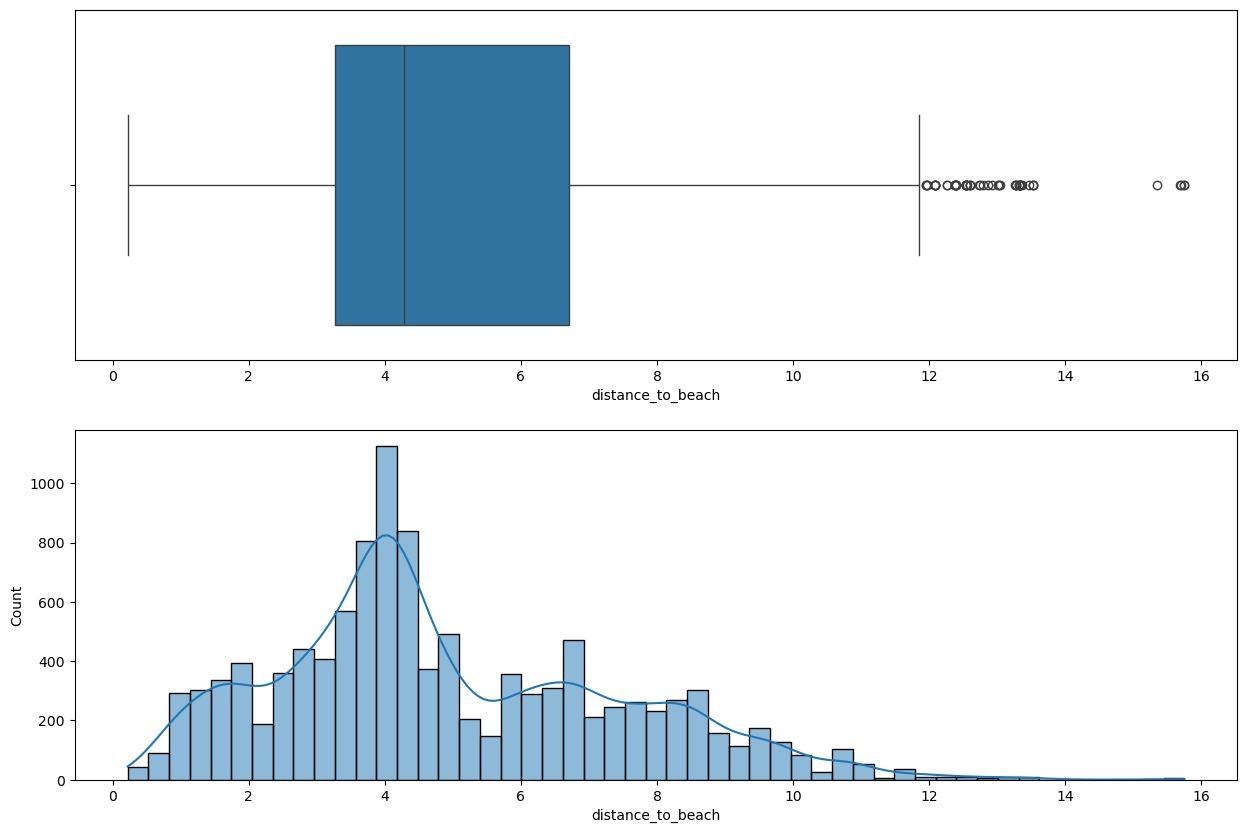

In [103]:
fig, axes = plt.subplots(ncols=1,nrows=2, figsize=(15,10))
sns.boxplot(data=df,x='distance_to_beach',ax=axes[0])
sns.histplot(df['distance_to_beach'],kde= True, ax=axes[1])

In [21]:
uppper_boundary=df['distance_to_airport'].mean() + 3* df['distance_to_airport'].std()
print("Upper bound for distance_to_airport:",uppper_boundary)

Upper bound for distance_to_airport: 8.650940108862269


### Distance to airport

<Axes: xlabel='distance_to_airport', ylabel='Count'>

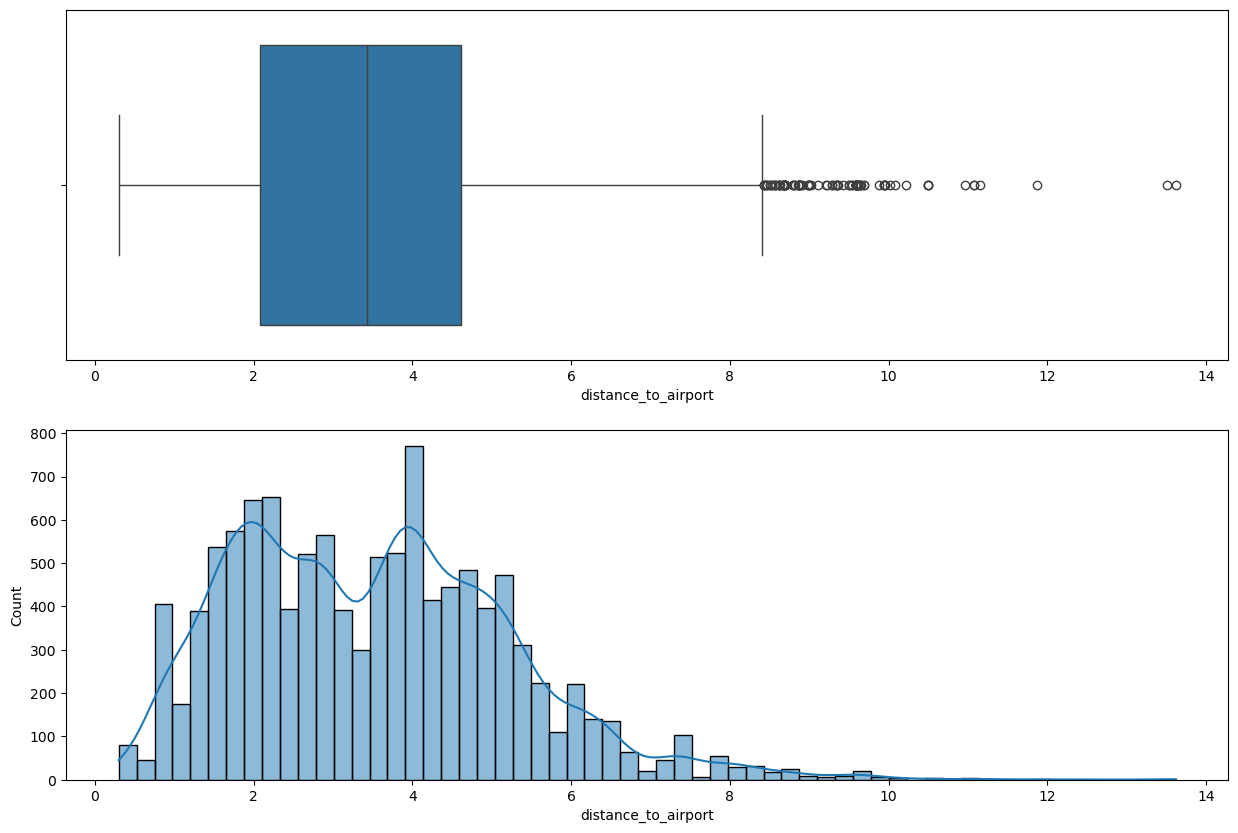

In [104]:
fig, axes = plt.subplots(ncols=1,nrows=2, figsize=(15,10))
sns.boxplot(data=df,x='distance_to_airport',ax=axes[0])
sns.histplot(df['distance_to_airport'],kde=True, ax=axes[1])

## Plotting categories

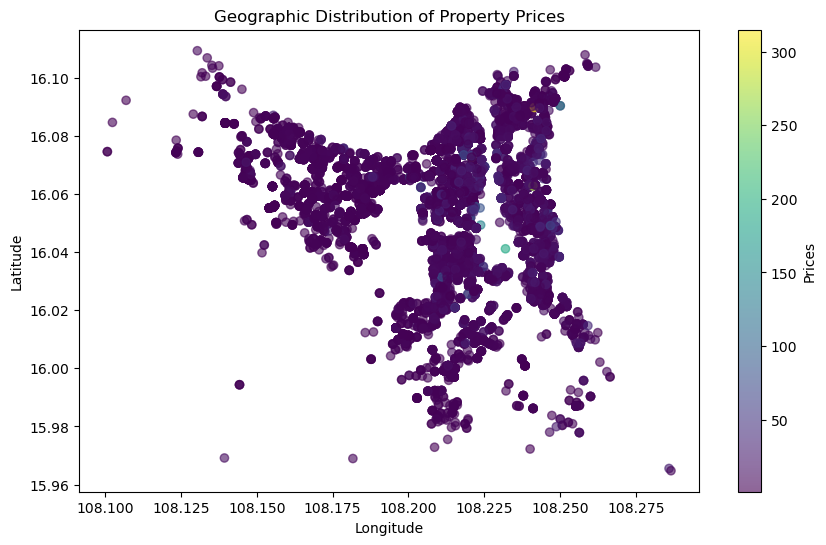

In [23]:
plt.figure(figsize=(10, 6))

sc = plt.scatter(df['Longitude'], df['Latitude'], c=df['Prices'], cmap='viridis', alpha=0.6)
plt.colorbar(sc, label='Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Property Prices')
plt.show()


### Housing prices at different districts

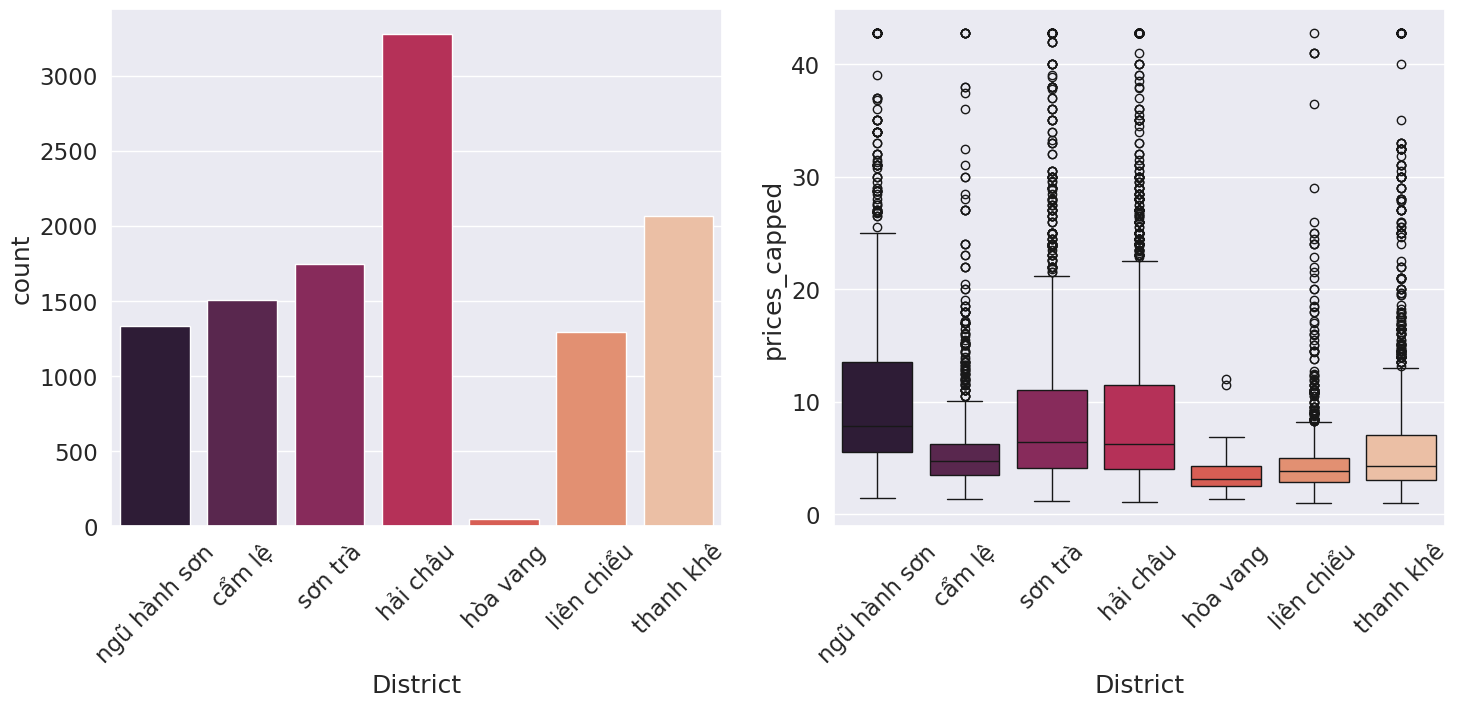

In [97]:
def plot_count(x,fig):
    plt.subplot(3,2,fig)
    ax1 = sns.countplot(x=df[x],palette=("rocket"), hue =df[x], legend=False)
    ax1.set_xticks(range(len(df[x].unique())))
    ax1.set_xticklabels(df[x].unique(), rotation = 45)
    plt.subplot(3,2,(fig+1))
    ax2 = sns.boxplot(x=df[x], y=df.prices_capped, palette=("rocket"), hue =df[x], legend=False)
    ax2.set_xticks(range(len(df[x].unique())))
    ax2.set_xticklabels(df[x].unique(), rotation = 45)
    
plt.figure(figsize=(15,20))
plot_count('District', 1)
plt.tight_layout()

### Housing prices with certificates compared to non-certificate

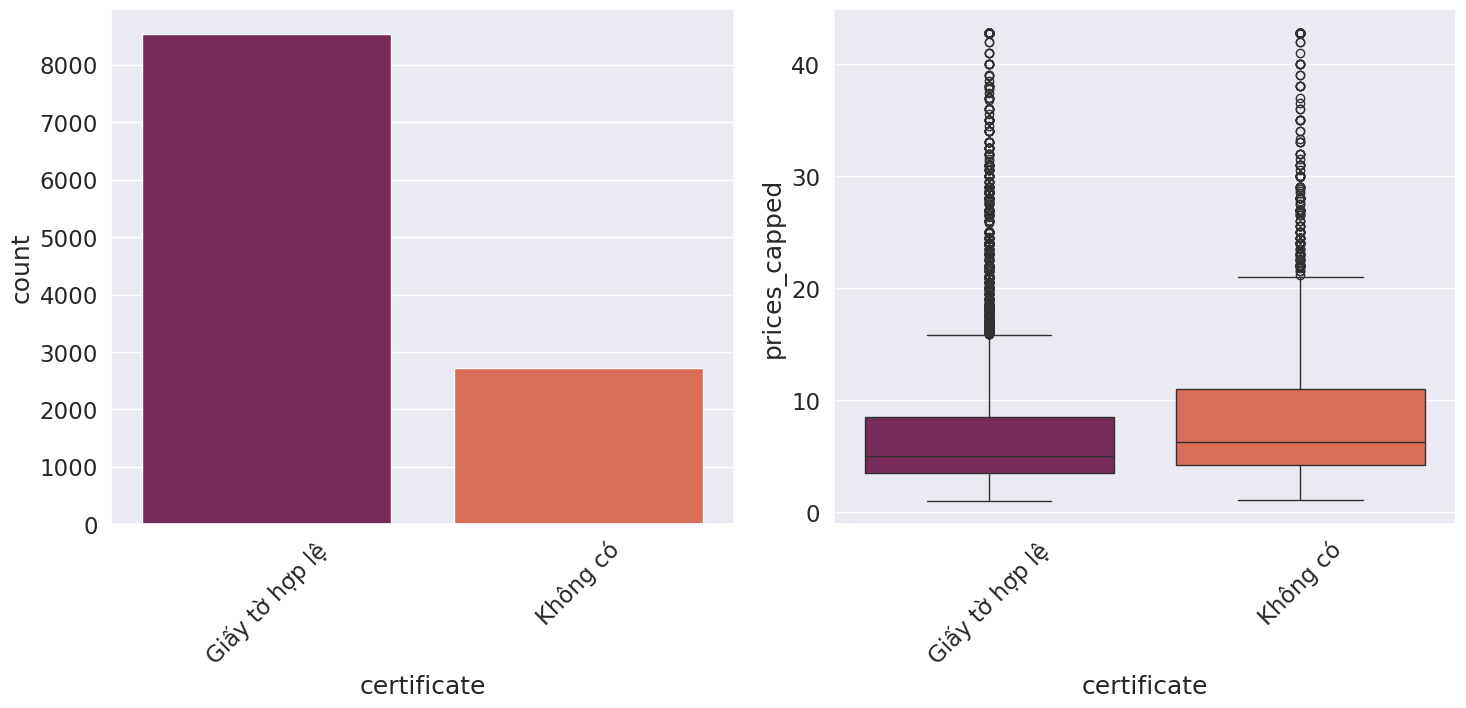

In [82]:
plt.figure(figsize=(15,20))
plot_count('certificate', 1)
plt.tight_layout()

### Housing prices at front compared to alley ones

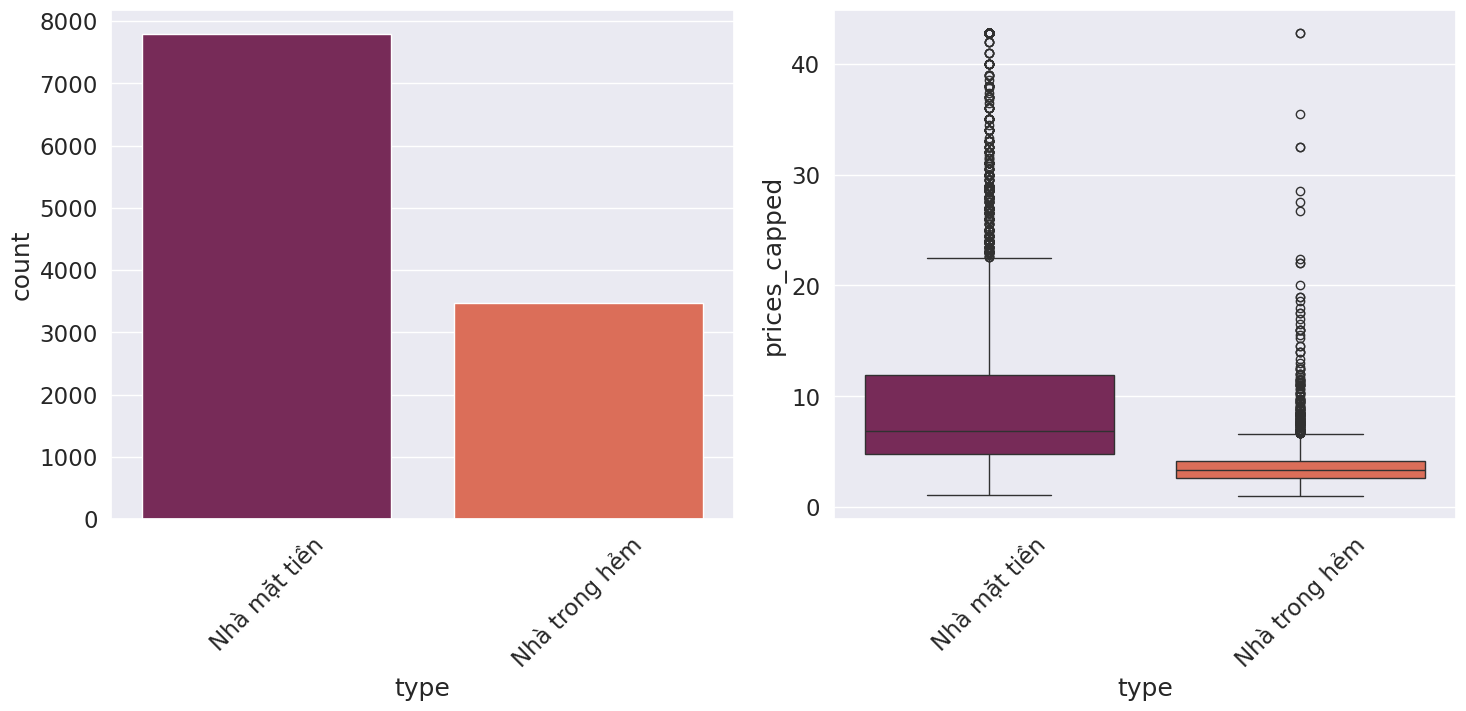

In [83]:
plt.figure(figsize=(15,20))
plot_count('type', 1)
plt.tight_layout()

### Housing prices with different floors

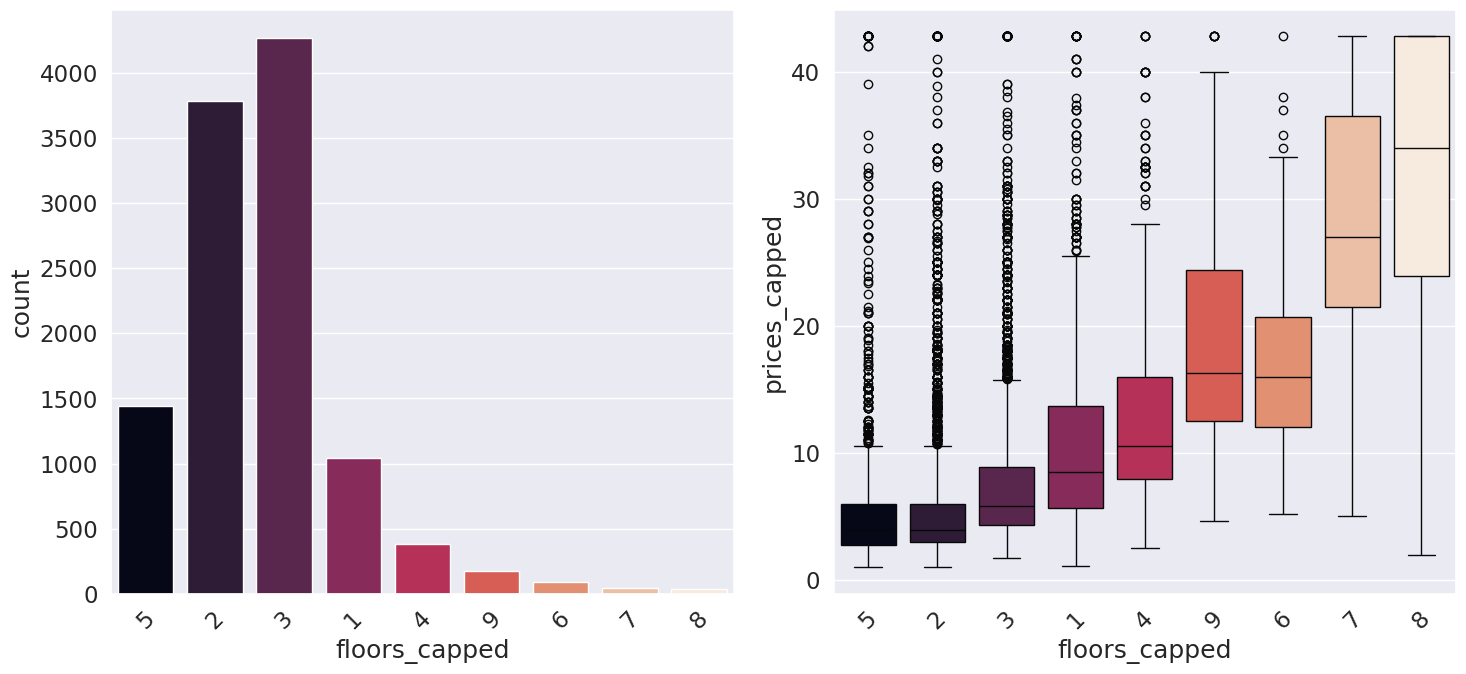

In [102]:
def plot_count_2(x,fig):
    plt.subplot(3,2,fig)
    ax1 = sns.countplot(x=df[x],palette=("rocket"), hue =df[x], legend=False)
    ax1.set_xticks(range(len(df[x].unique())))
    ax1.set_xticklabels(df[x].unique(), rotation = 45)
    plt.subplot(3,2,(fig+1))
    ax2 = sns.boxplot(x=df[x], y=df.prices_capped, palette=("rocket"), hue =df[x], legend=False)
    ax2.set_xticks(range(len(df[x].unique())))
    ax2.set_xticklabels(df[x].unique(), rotation = 45)
plt.figure(figsize=(15,20))
plot_count_2('floors_capped', 1)
plt.tight_layout()

### Housing prices with with each ward within each district

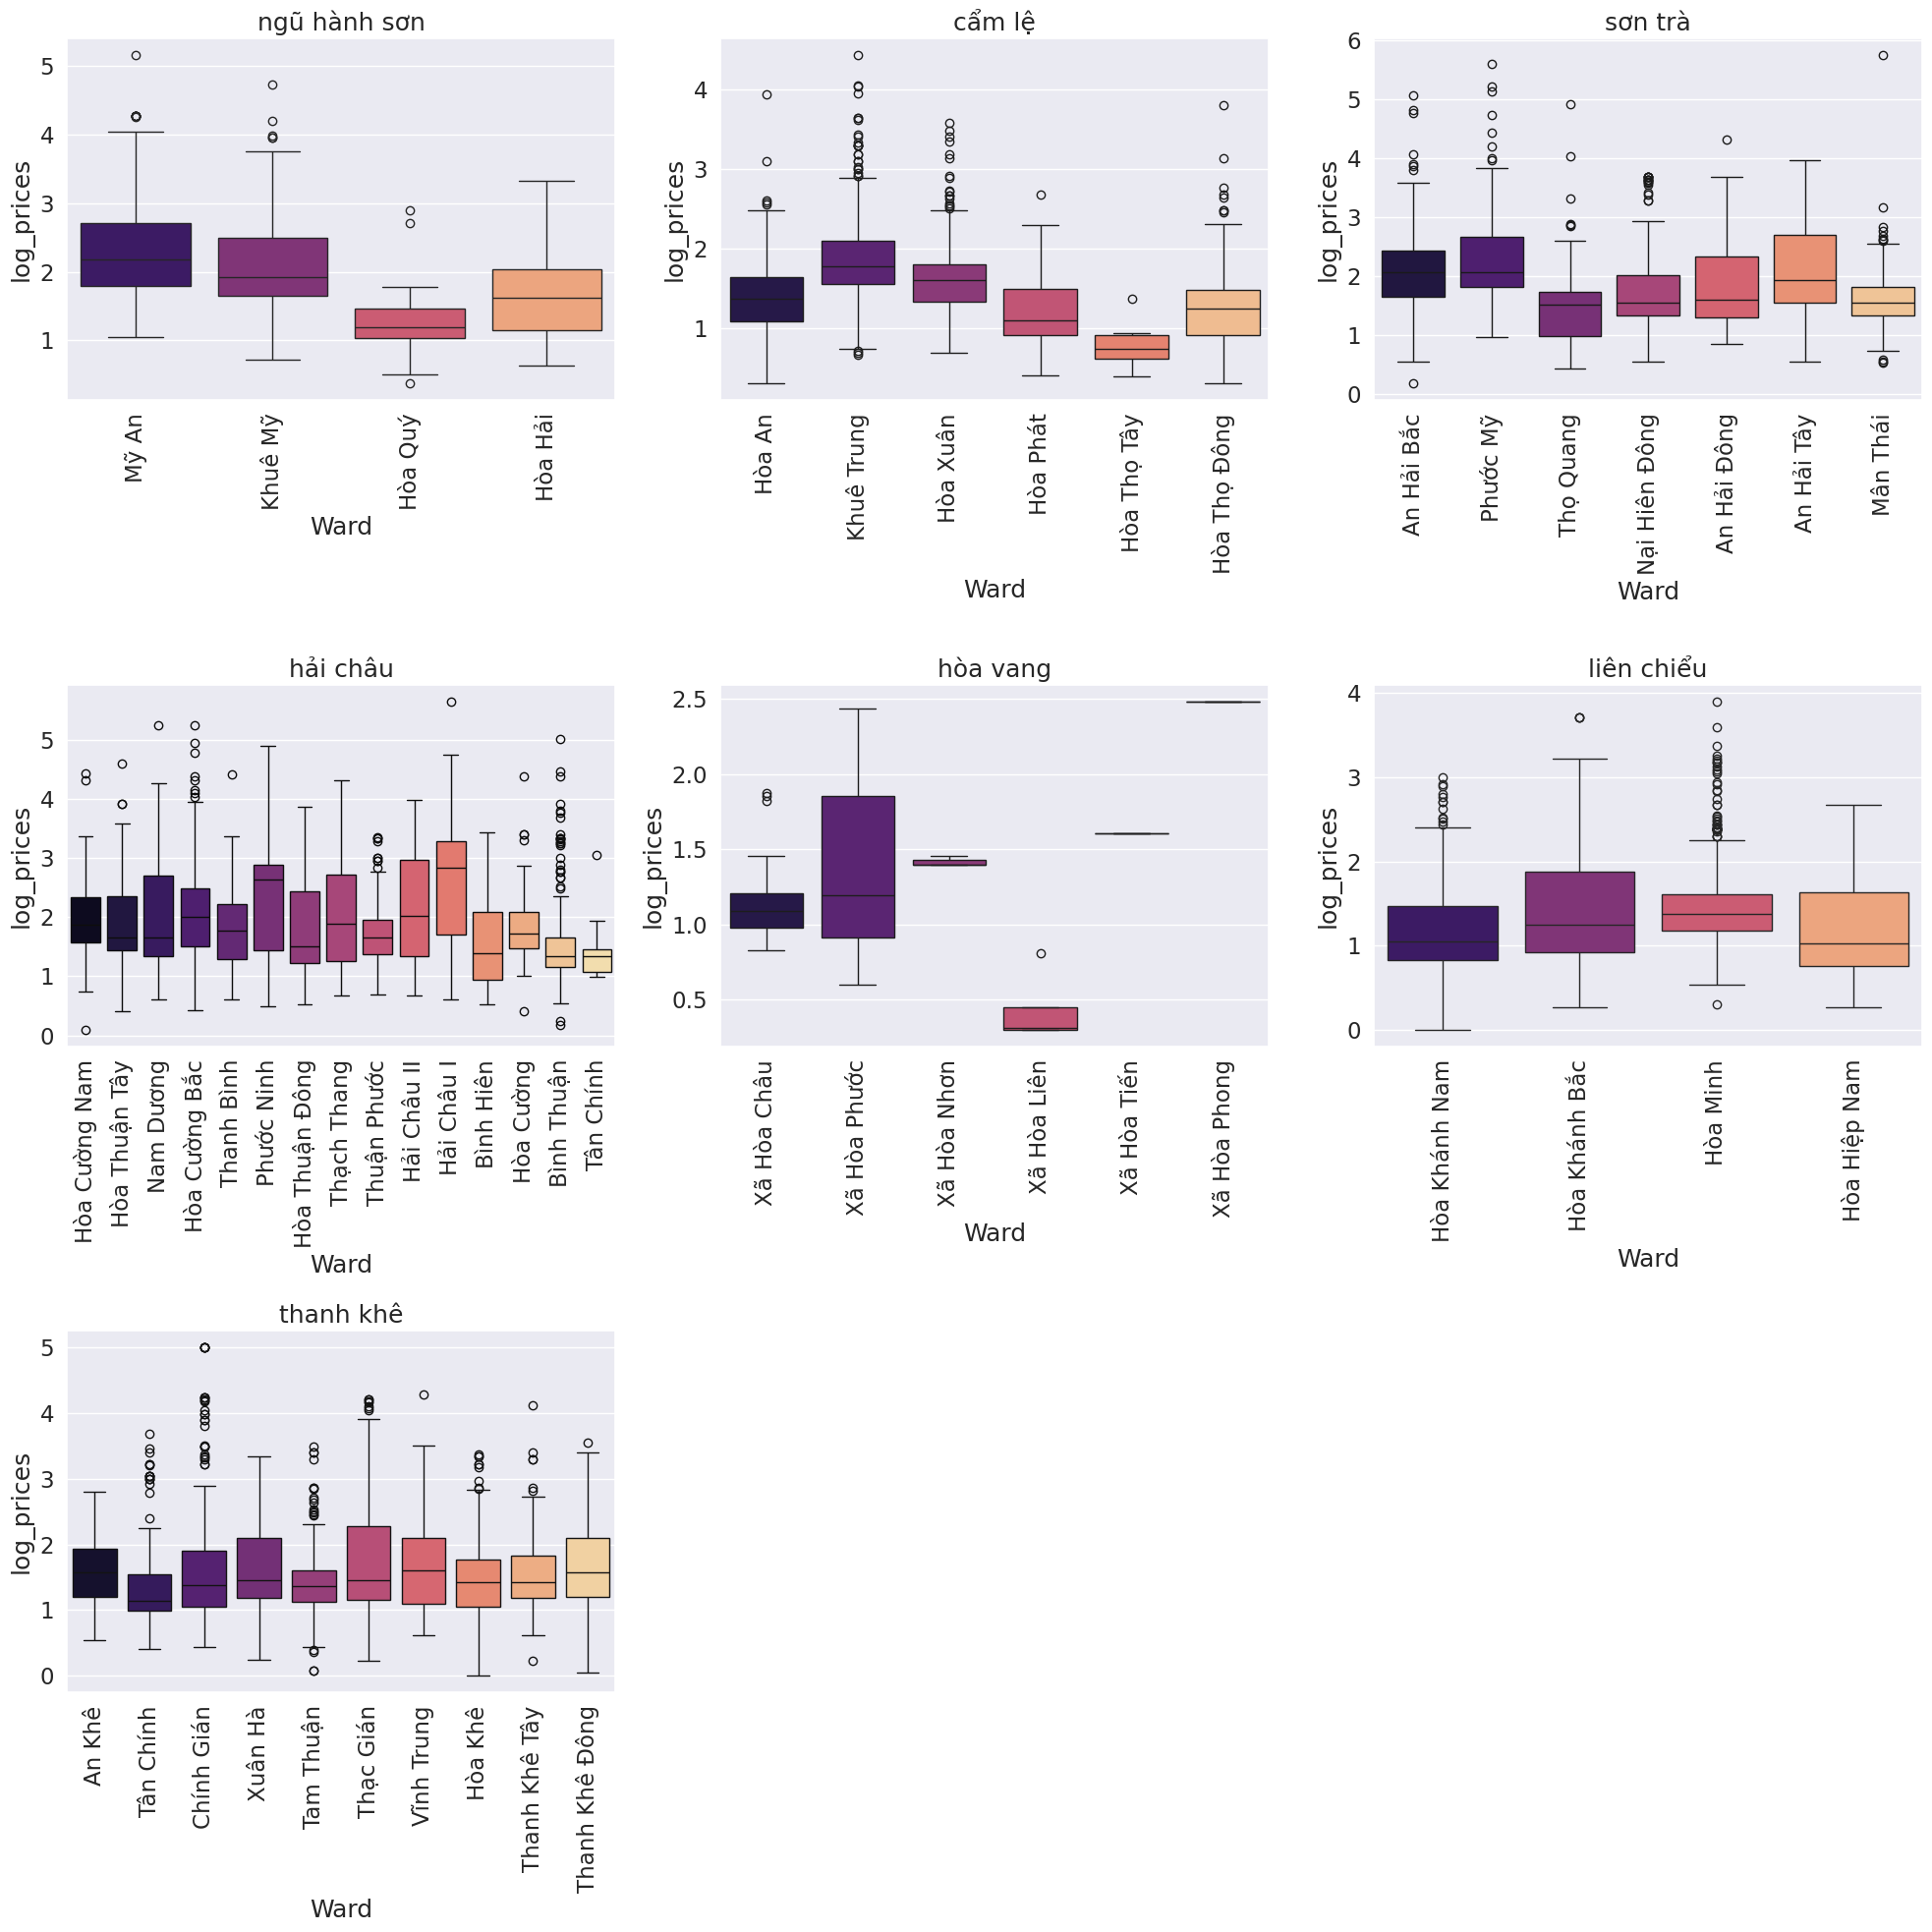

In [110]:
count =1
plt.figure(figsize=(20,20))
for i in df['District'].unique():
    PricesByWard = df[df.District == i]

    sns.set(font_scale = 1.5)
    plt.subplot(3,3,count)
    #plt.scatter(PricesByWard['Ward'],PricesByWard['Prices'])
    sns.boxplot(x=PricesByWard['Ward'], y=PricesByWard['log_prices'], palette=("magma"), hue = PricesByWard['Ward'], legend = False)
    plt.title(i)

    plt.xticks(rotation=90)
    count+=1


plt.tight_layout()

### Housing prices correlation with area, width, length

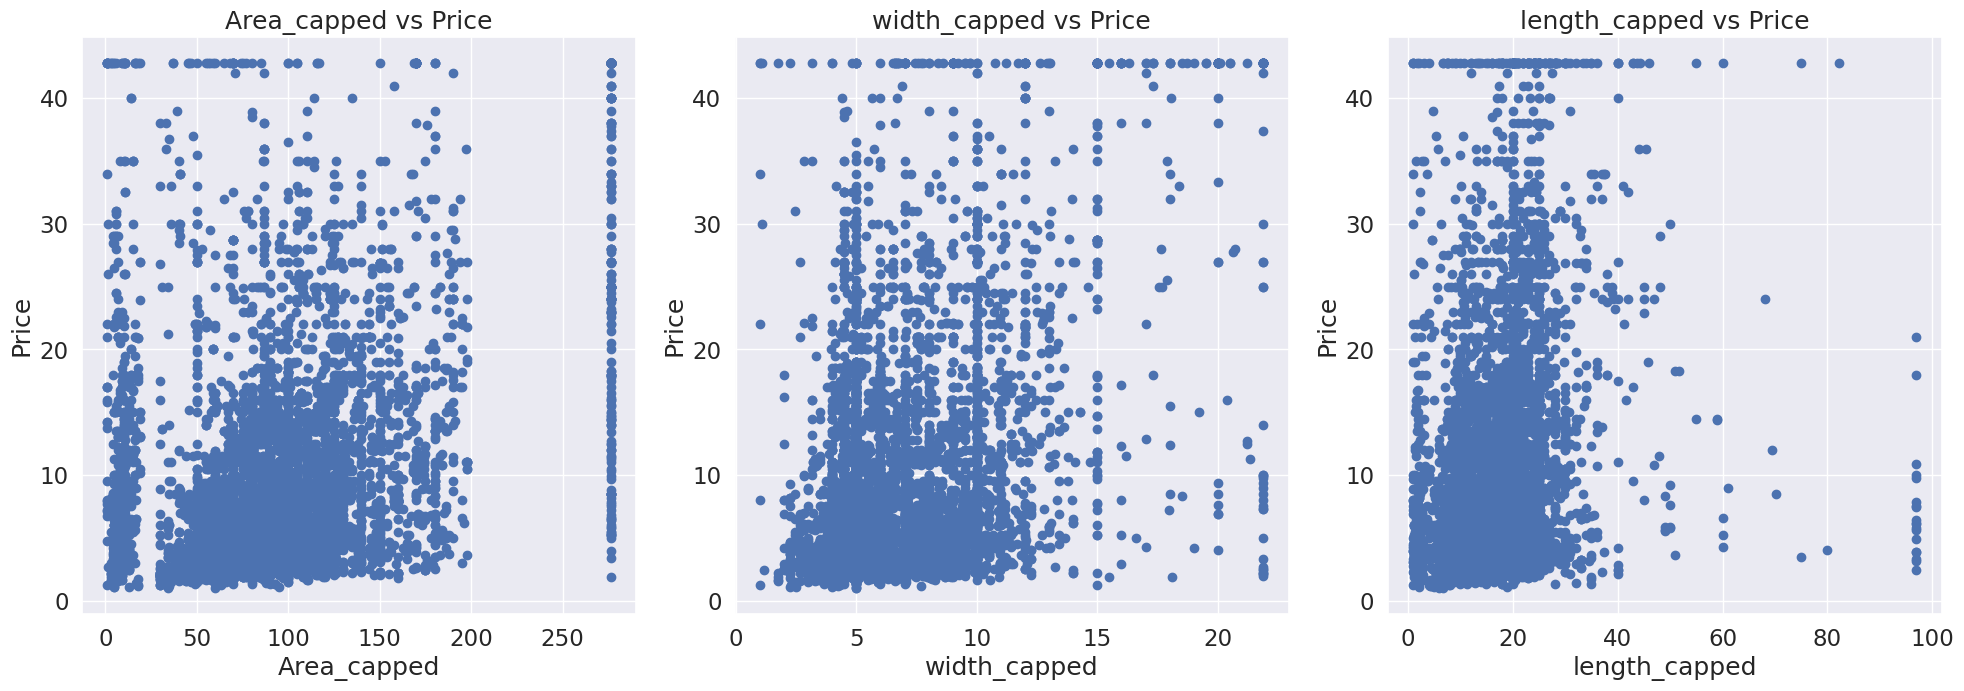

In [107]:
def scatter(x,fig):
    sns.set(font_scale = 1.5)
    plt.subplot(3,3,fig)
    plt.scatter(df[x],df['prices_capped'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(20,20))

scatter('Area_capped', 1)
scatter('width_capped', 2)
scatter('length_capped', 3)
# scatter('Area', 1)
# scatter('log_width', 2)
# scatter('log_length', 3)

plt.tight_layout()


### Housing prices with distance

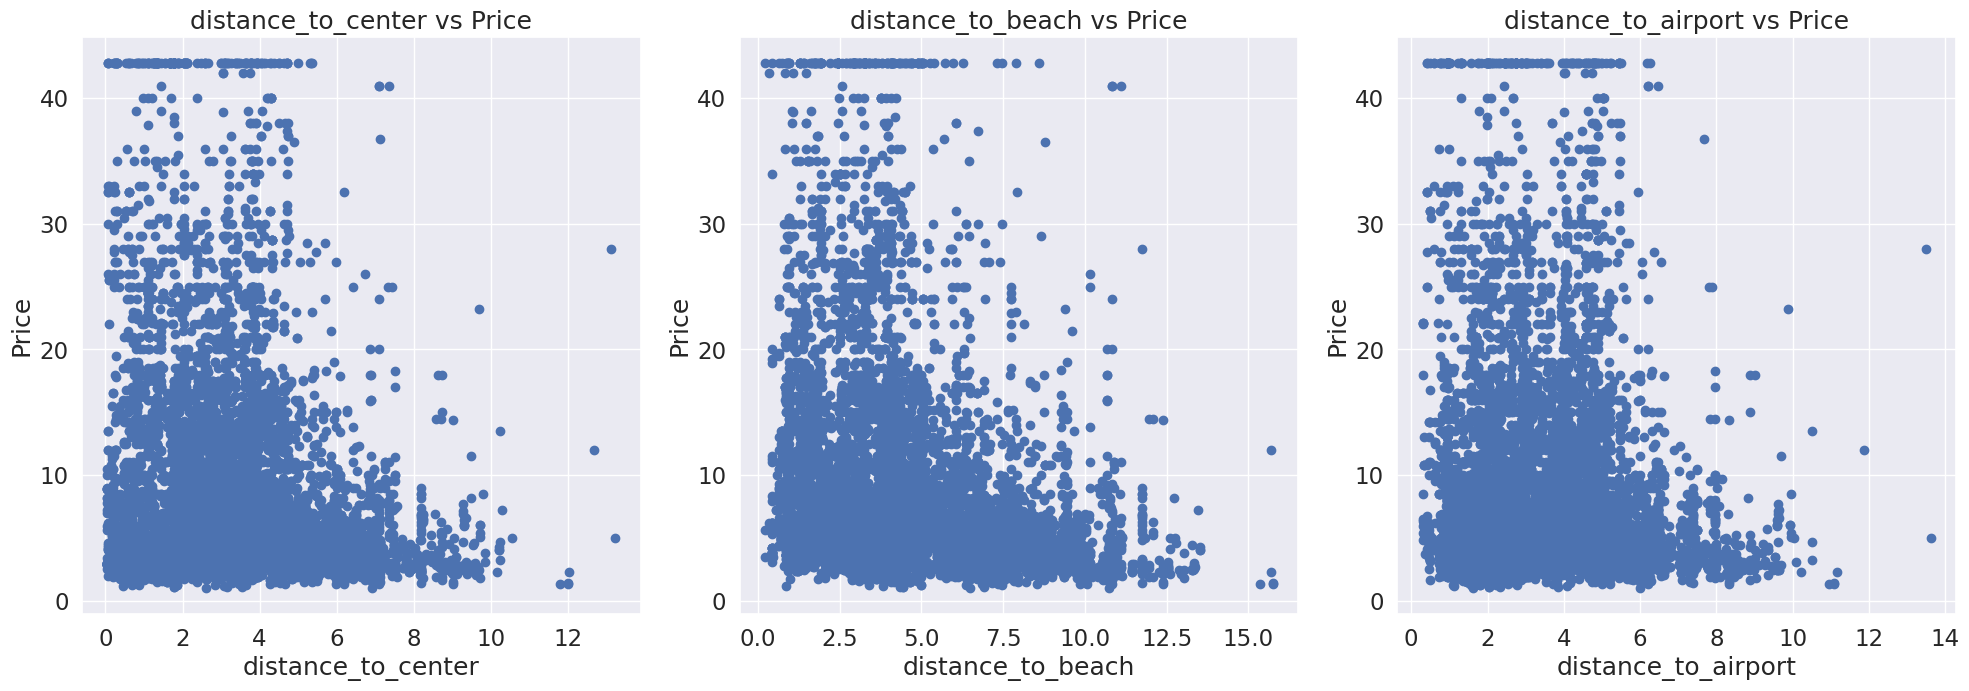

In [113]:
plt.figure(figsize=(20,20))

scatter('distance_to_center', 1)
scatter('distance_to_beach', 2)
scatter('distance_to_airport', 3)


plt.tight_layout()

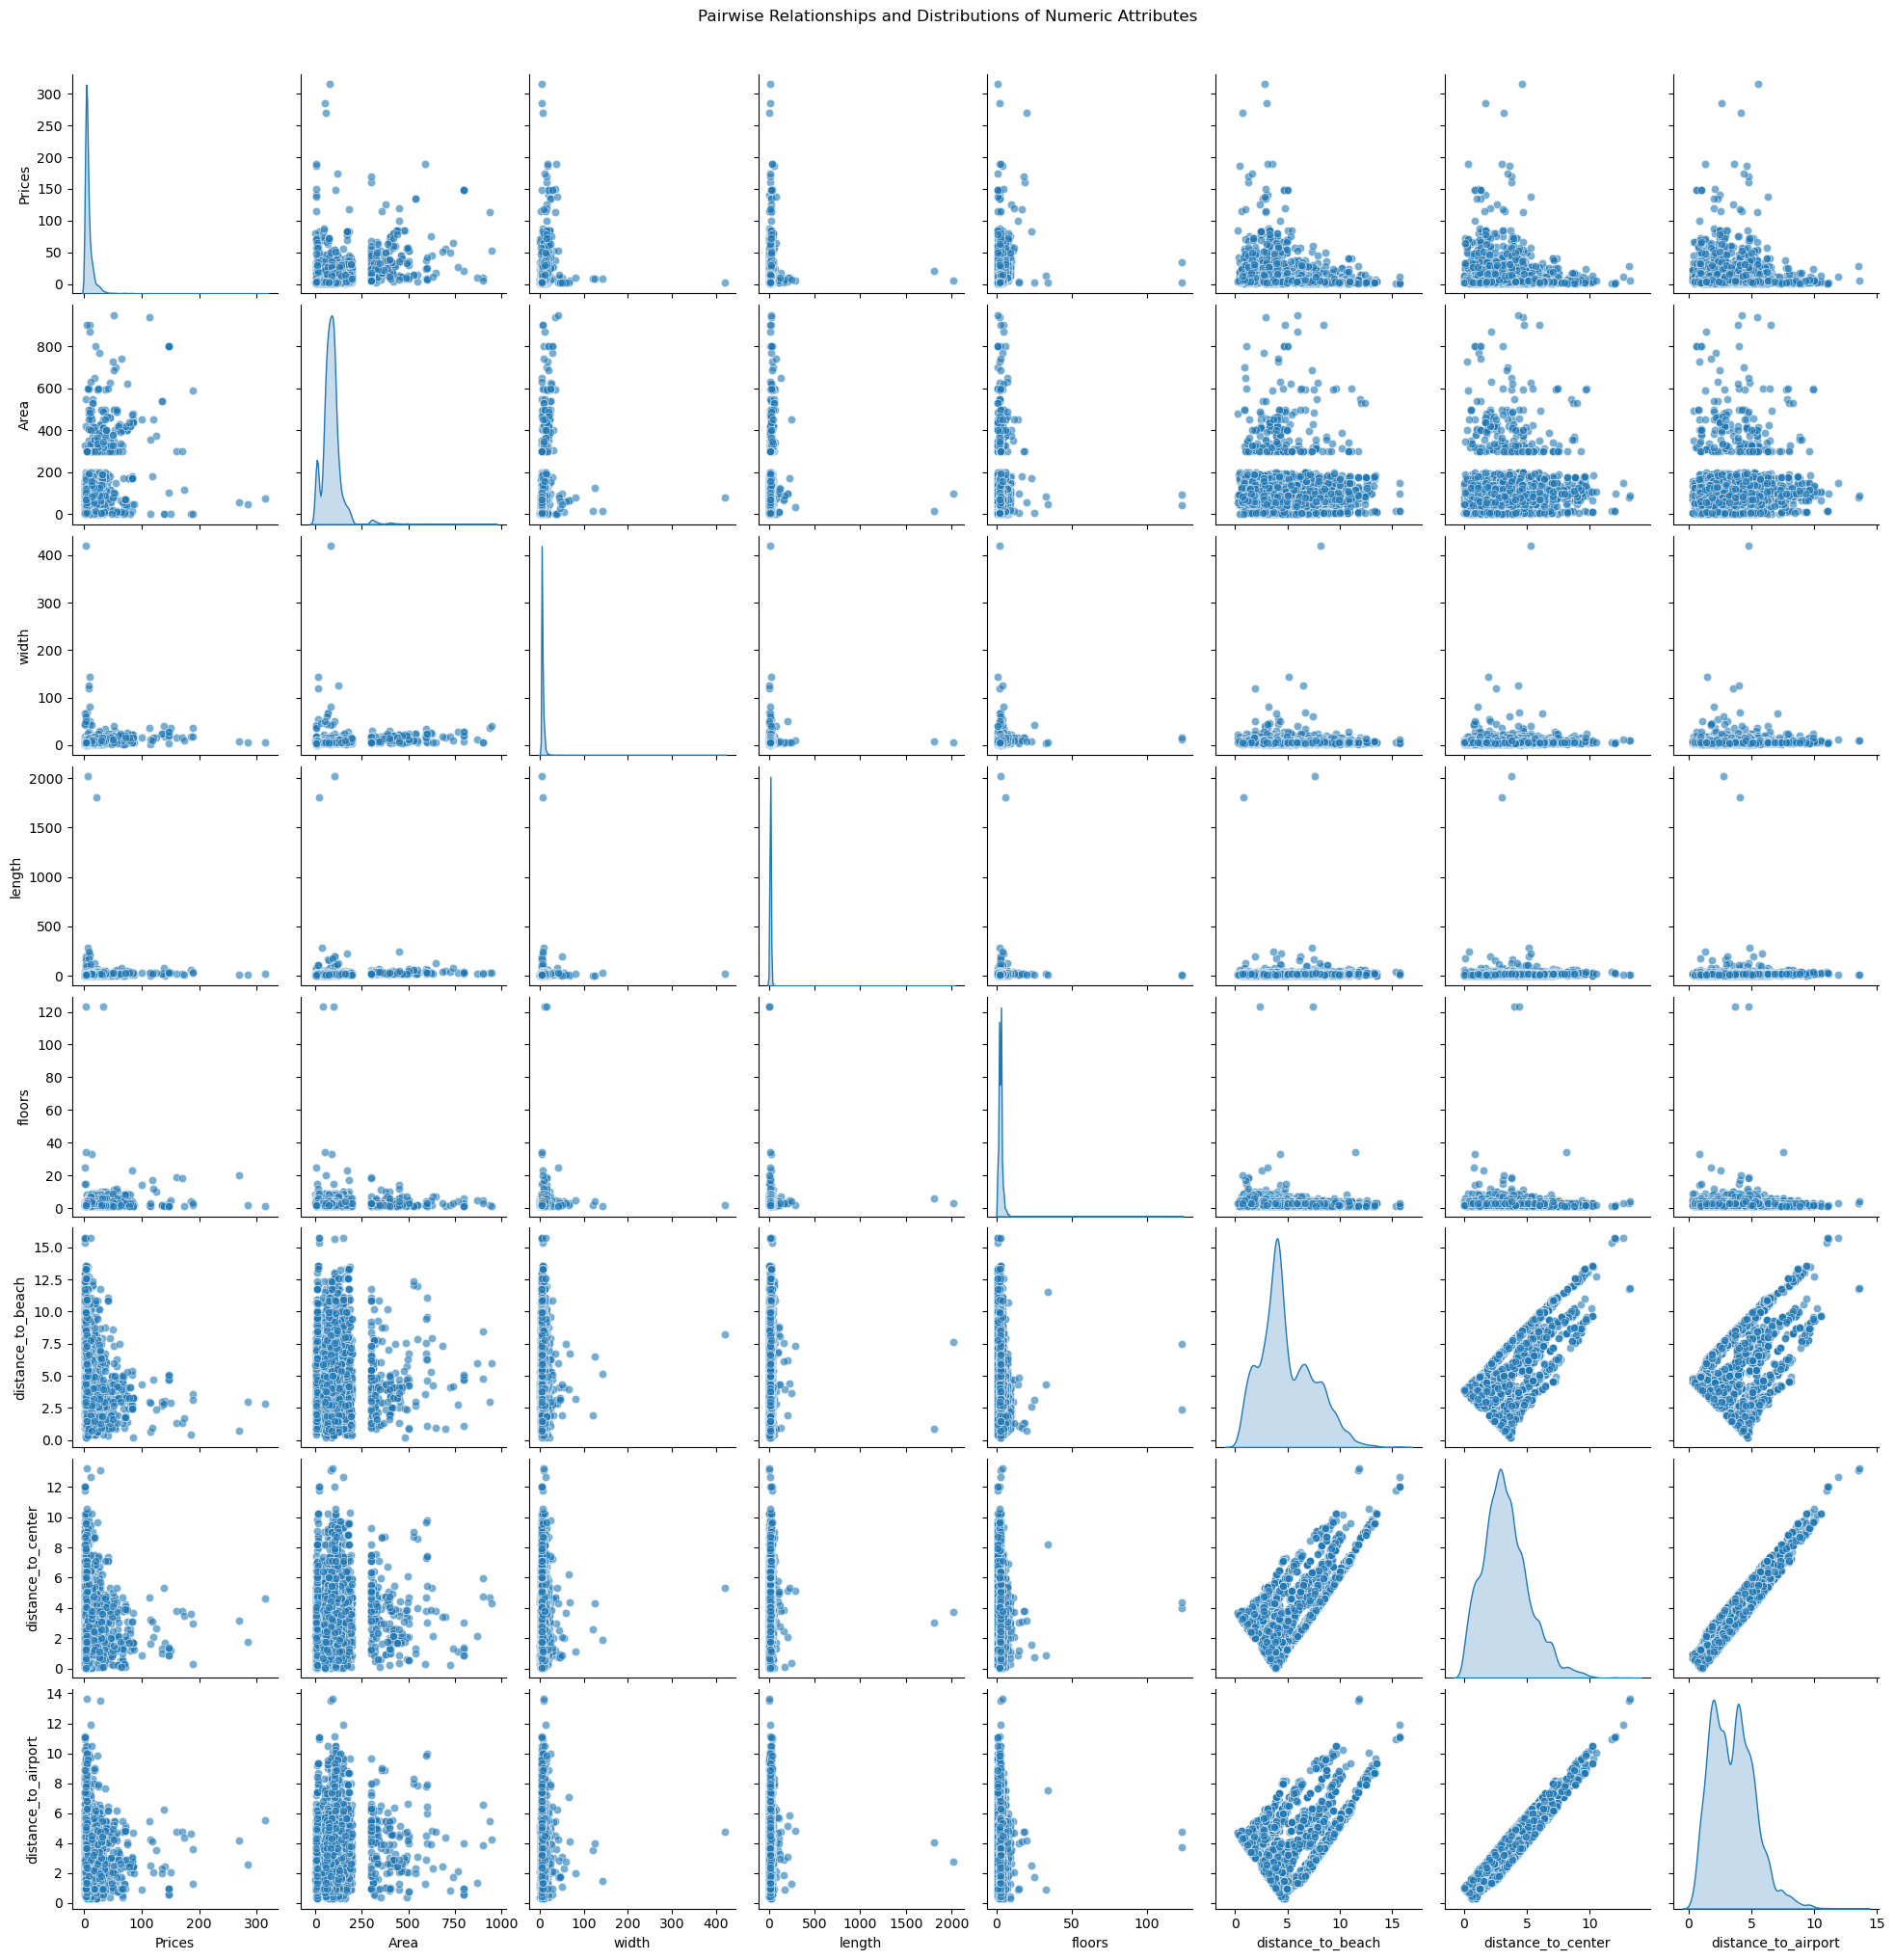

In [109]:
selected_columns = ['Prices', 'Area', 'width', 'length', 'floors', 'distance_to_beach', 'distance_to_center', 'distance_to_airport']

sns.pairplot(df[selected_columns], diag_kind="kde", plot_kws={'alpha': 0.6})

plt.suptitle("Pairwise Relationships and Distributions of Numeric Attributes", y=1.02)

plt.show()

### Correlation

<Axes: >

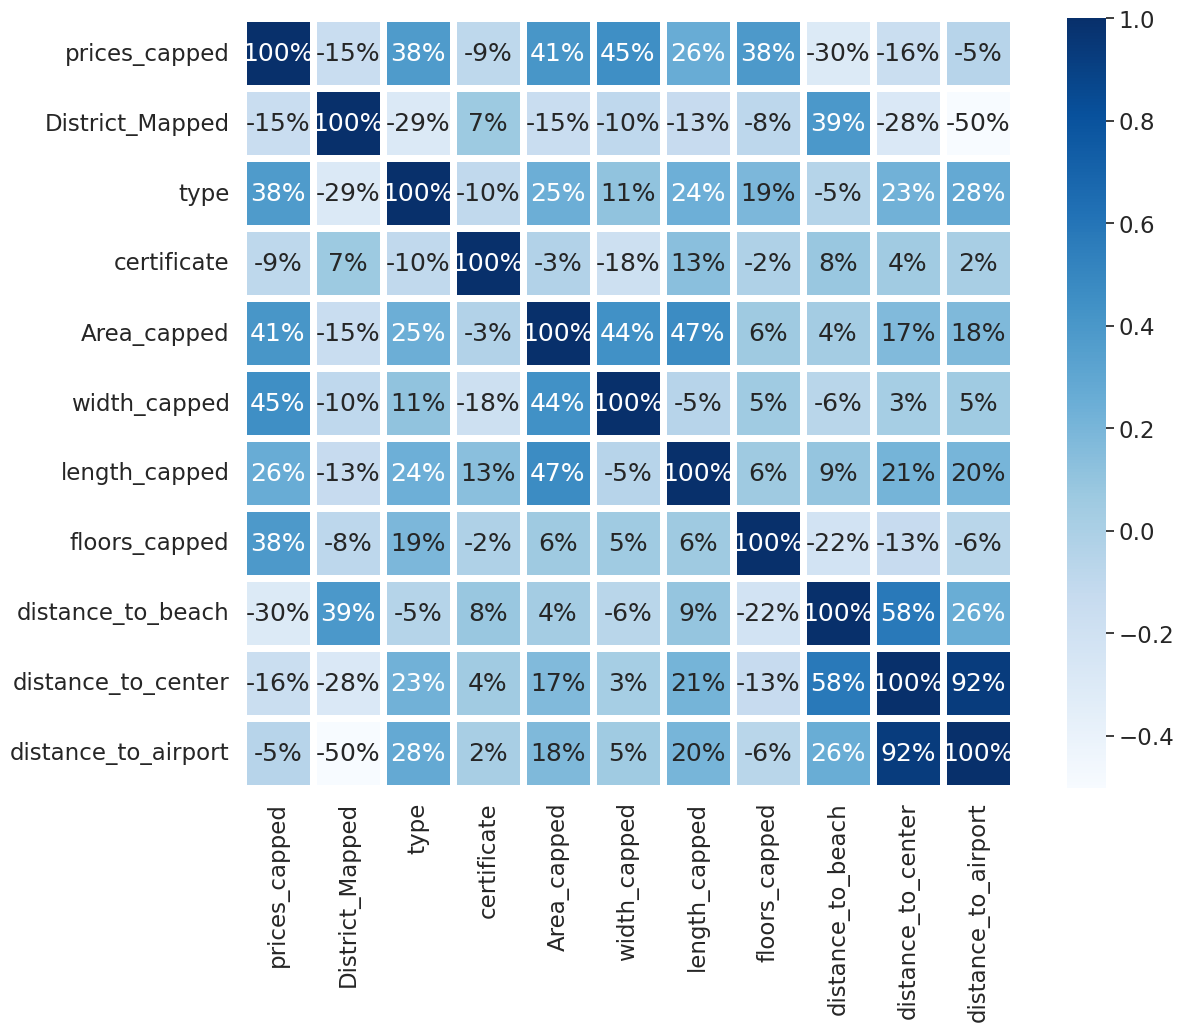

In [142]:
cols_pv = ['prices_capped','District_Mapped','type','certificate','Area_capped','width_capped','length_capped','floors_capped','distance_to_beach','distance_to_center','distance_to_airport']
plt.figure(figsize=(14, 10)) 
sns.heatmap(df[cols_pv].corr(),annot=True, linewidths=5, square=True, cmap='Blues', fmt=".0%")

### Splitting data to train

In [263]:
from sklearn.model_selection import train_test_split
cols = ['prices_capped','District_Mapped','type','certificate','Area_capped','width_capped','length_capped','floors_capped','distance_to_beach','distance_to_center','distance_to_airport']
house = df[cols]
df_train, df_test = train_test_split(house, test_size = 0.2, random_state=123)

print(df_train.shape)
print(df_test.shape)

(9029, 11)
(2258, 11)


In [264]:
X_train = df_train.copy()
X_test = df_test.copy()

print("X_train: {0}".format(X_train.shape))
print("X_test: {0}".format(X_test.shape))


X_train: (9029, 11)
X_test: (2258, 11)


In [265]:
y_train = X_train.pop('prices_capped')
y_test = X_test.pop('prices_capped')
print("Y_train: {0}".format(y_train.shape))
print("y_test: {0}".format(y_test.shape))

Y_train: (9029,)
y_test: (2258,)


In [266]:
from sklearn.preprocessing import StandardScaler,Normalizer,PowerTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline
scaler = StandardScaler()
X_train =  pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test =  pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

<Figure size 1500x2000 with 0 Axes>

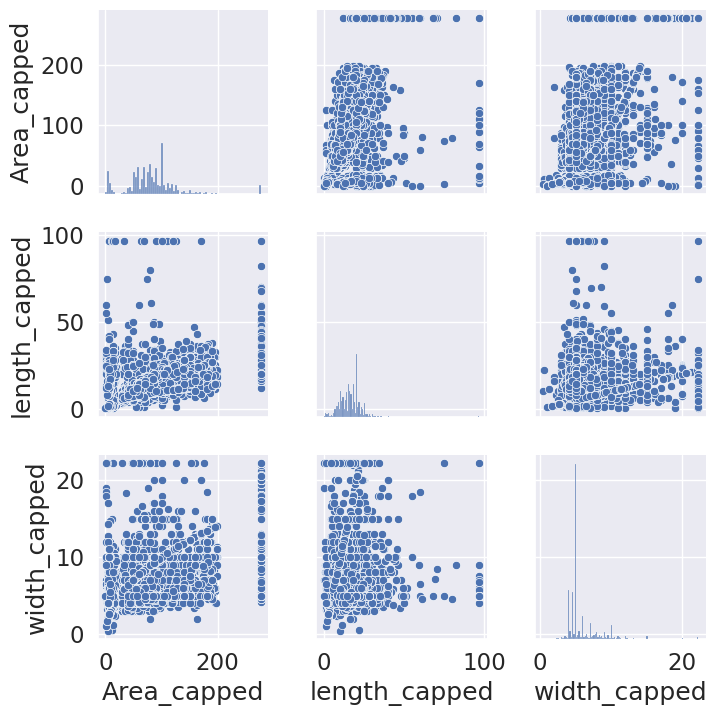

In [267]:
plt.figure(figsize=(15,20))
sns.pairplot(df[['Area_capped','length_capped','width_capped']])
plt.tight_layout()

<Figure size 1500x2000 with 0 Axes>

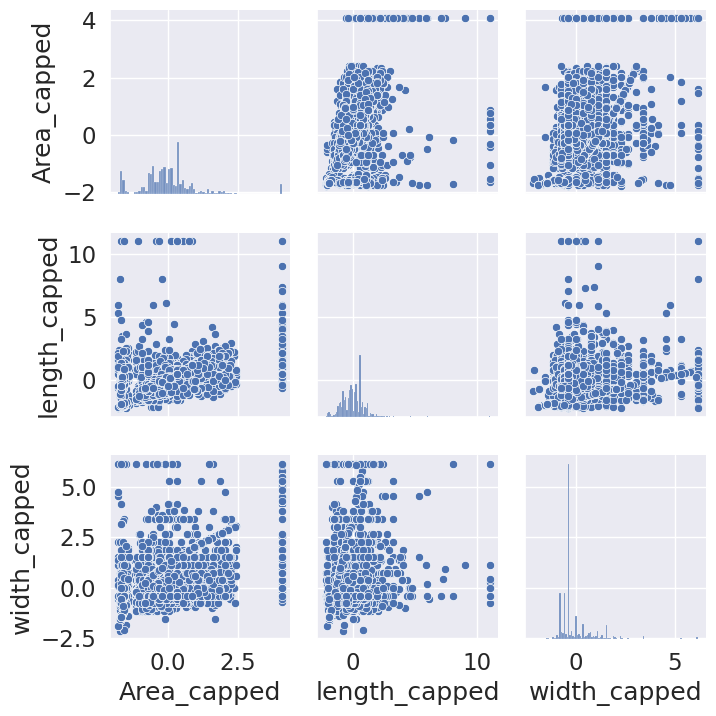

In [268]:
plt.figure(figsize=(15,20))
sns.pairplot(X_train[['Area_capped','length_capped','width_capped']])
plt.tight_layout()

In [269]:
from sklearn.linear_model import LinearRegression

# Dùng LinerRegression
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)


LinearRegression()

In [270]:
y_pred_LR  = model_LR.predict(X_test)

In [271]:
mae=mean_absolute_error(y_test,y_pred_LR)
mse = mean_squared_error(y_test, y_pred_LR)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_LR)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Mean Absolute Error (MAE): 3.32
Mean Squared Error (MSE): 27.98
Root Mean Squared Error (RMSE): 5.29
R-squared (R2): 0.48


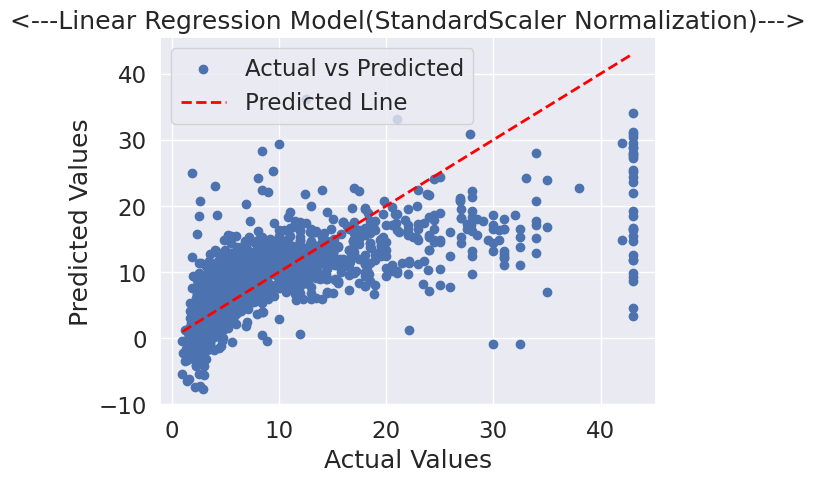

In [272]:
plt.scatter(y_test, y_pred_LR, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Predicted Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("<---Linear Regression Model(StandardScaler Normalization)--->")
plt.legend()
plt.show()

In [299]:
x = df[cols].drop('prices_capped',axis = 1)
y = df['prices_capped']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=233)

In [300]:
# scaler = Normalizer()
scaler =MinMaxScaler()
x_train =  pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_test =  pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

In [301]:
model_MinMax = LinearRegression()
model_MinMax.fit(x_train, y_train)

LinearRegression()

In [302]:
y_pred = model_MinMax.predict(x_test)

In [303]:
mae=mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Mean Absolute Error (MAE): 3.27
Mean Squared Error (MSE): 26.77
Root Mean Squared Error (RMSE): 5.17
R-squared (R2): 0.51


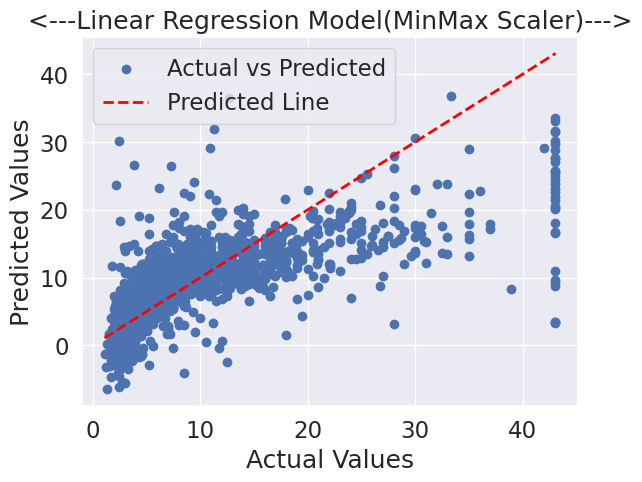

In [304]:
plt.scatter(y_test, y_pred, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Predicted Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("<---Linear Regression Model(MinMax Scaler)--->")
plt.legend()
plt.show()